# **Deep Learning - Rendu n°2 : Cas d'études**

Elyes KHALFALLAH - 5230635

13/12/2024

---


## **1 :** Jeu de données


### **1.2 :** Quelques statistiques descriptives


In [57]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [58]:
# Chargement des fichiers CSV
train_df = pd.read_csv("train.csv", sep="\t")
test_df = pd.read_csv("test.csv", sep="\t")


In [59]:
# Afficher les quelques premieres lignes
train_df.head()


,track_name,track_popularity,track_album_name,track_album_release_date,playlist_name,playlist_id,playlist_genre,playlist_subgenre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,Grow Up (feat. Chikk),55,90's Kid,2015-03-10,Chicano Rap,3o3xRXWMtBMezk0E3wmtGI,latin,latin hip hop,0.714,0.659,5,-7.423,0,0.3070,0.68800,0.000008,0.1280,0.6710,87.119,187587
1,Шлюза за дым,25,Попеременно,2013-11-11,Russian Gangster Rap,0u0qLLE8MZc679RZWCk1TT,rap,gangster rap,0.372,0.653,8,-5.588,0,0.0625,0.03640,0.010200,0.0636,0.0395,84.150,188421
2,"DANI: Bzrp Freestyle Sessions, Vol. 7",71,"DANI: Bzrp Freestyle Sessions, Vol. 7",2019-11-07,Trap Argentino - Trap Argentina,6ltss0ThreZ3uIMn5mr4Tm,rap,trap,0.924,0.622,0,-6.824,1,0.2330,0.09950,0.000000,0.0971,0.7400,130.063,137365
3,Oxygen,46,Teen Beach Movie,2013-01-01,post teen pop,45AKTTGQEfYgAyidW5hucn,pop,post-teen pop,0.592,0.935,4,-3.869,1,0.0584,0.00431,0.000000,0.1390,0.5170,127.967,181693
4,Opowieści z Doliny Smoków,65,Opowieści z Doliny Smoków,2019-10-28,Trap strefa,37i9dQZF1DWY3UKS6jvnxr,rap,trap,0.548,0.579,10,-7.576,0,0.3230,0.18800,0.000000,0.0857,0.2840,113.563,197997


In [60]:
# Obtenir les types des données de chaque colonnes
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21428 entries, 0 to 21427
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   track_name                21428 non-null  object 
 1   track_popularity          21428 non-null  int64  
 2   track_album_name          21428 non-null  object 
 3   track_album_release_date  21428 non-null  object 
 4   playlist_name             21428 non-null  object 
 5   playlist_id               21428 non-null  object 
 6   playlist_genre            21428 non-null  object 
 7   playlist_subgenre         21428 non-null  object 
 8   danceability              21428 non-null  float64
 9   energy                    21428 non-null  float64
 10  key                       21428 non-null  int64  
 11  loudness                  21428 non-null  float64
 12  mode                      21428 non-null  int64  
 13  speechiness               21428 non-null  float64
 14  acoust

- `float64(9)`, `int64(4)`, nous avons 13 données de type quantitatives
- `object(7)`, nous avons 7 données de type descriptives


---


Commençons par approfondir notre analyse : examinons quelques statistiques descriptives sur les variables quantitatives. Nous observerons aussi la distribution des genres et sous-genres afin de mieux comprendre la répartition des pistes dans notre ensemble de données. Ce premier aperçu nous aidera à saisir les principales tendances et à identifier d’éventuels déséquilibres dans les catégories.

In [61]:
# Obtenir des statistiques descriptives des colonnes numériques
train_df.describe()


,track_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000,21428.000000
mean,44.281361,0.655208,0.674350,5.383750,-7.015828,0.580222,0.111523,0.197351,0.053986,0.185806,0.535244,119.728569,226668.716166
std,24.986523,0.149691,0.181376,3.619597,3.053621,0.493534,0.106377,0.227759,0.179311,0.150123,0.226973,28.708273,57745.824683
min,0.000000,0.077100,0.000175,0.000000,-46.448000,0.000000,0.022400,0.000001,0.000000,0.009360,0.000010,35.477000,29493.000000
25%,27.000000,0.558000,0.554000,2.000000,-8.505250,0.000000,0.040275,0.023800,0.000000,0.092800,0.361000,96.541500,190191.250000
50%,48.000000,0.676000,0.695000,6.000000,-6.460000,1.000000,0.063500,0.105000,0.000006,0.125000,0.540000,117.943000,218933.000000
75%,64.000000,0.766000,0.815000,9.000000,-4.893750,1.000000,0.143000,0.296000,0.001273,0.238000,0.713000,137.307250,255392.500000
max,100.000000,0.979000,1.000000,11.000000,1.275000,1.000000,0.918000,0.994000,0.994000,0.994000,0.990000,239.440000,517810.000000


In [62]:
# Distribution des genres musicaux des morceaux regardés
genre_counts = train_df["playlist_genre"].value_counts()
print(genre_counts)


playlist_genre
rap      4594
pop      4406
r&b      4345
latin    4122
rock     3961
Name: count, dtype: int64


In [63]:
# Distribution des sous-genres musicaux des morceaux regardés
subgenre_counts = train_df["playlist_subgenre"].value_counts()
print(subgenre_counts)


playlist_subgenre
southern hip hop      1343
neo soul              1339
indie poptimism       1338
latin hip hop         1315
hard rock             1209
gangster rap          1177
urban contemporary    1100
electropop            1094
dance pop             1060
hip hop               1057
tropical              1037
classic rock          1032
trap                  1017
latin pop             1011
hip pop                996
post-teen pop          914
new jack swing         910
permanent wave         875
album rock             845
reggaeton              759
Name: count, dtype: int64


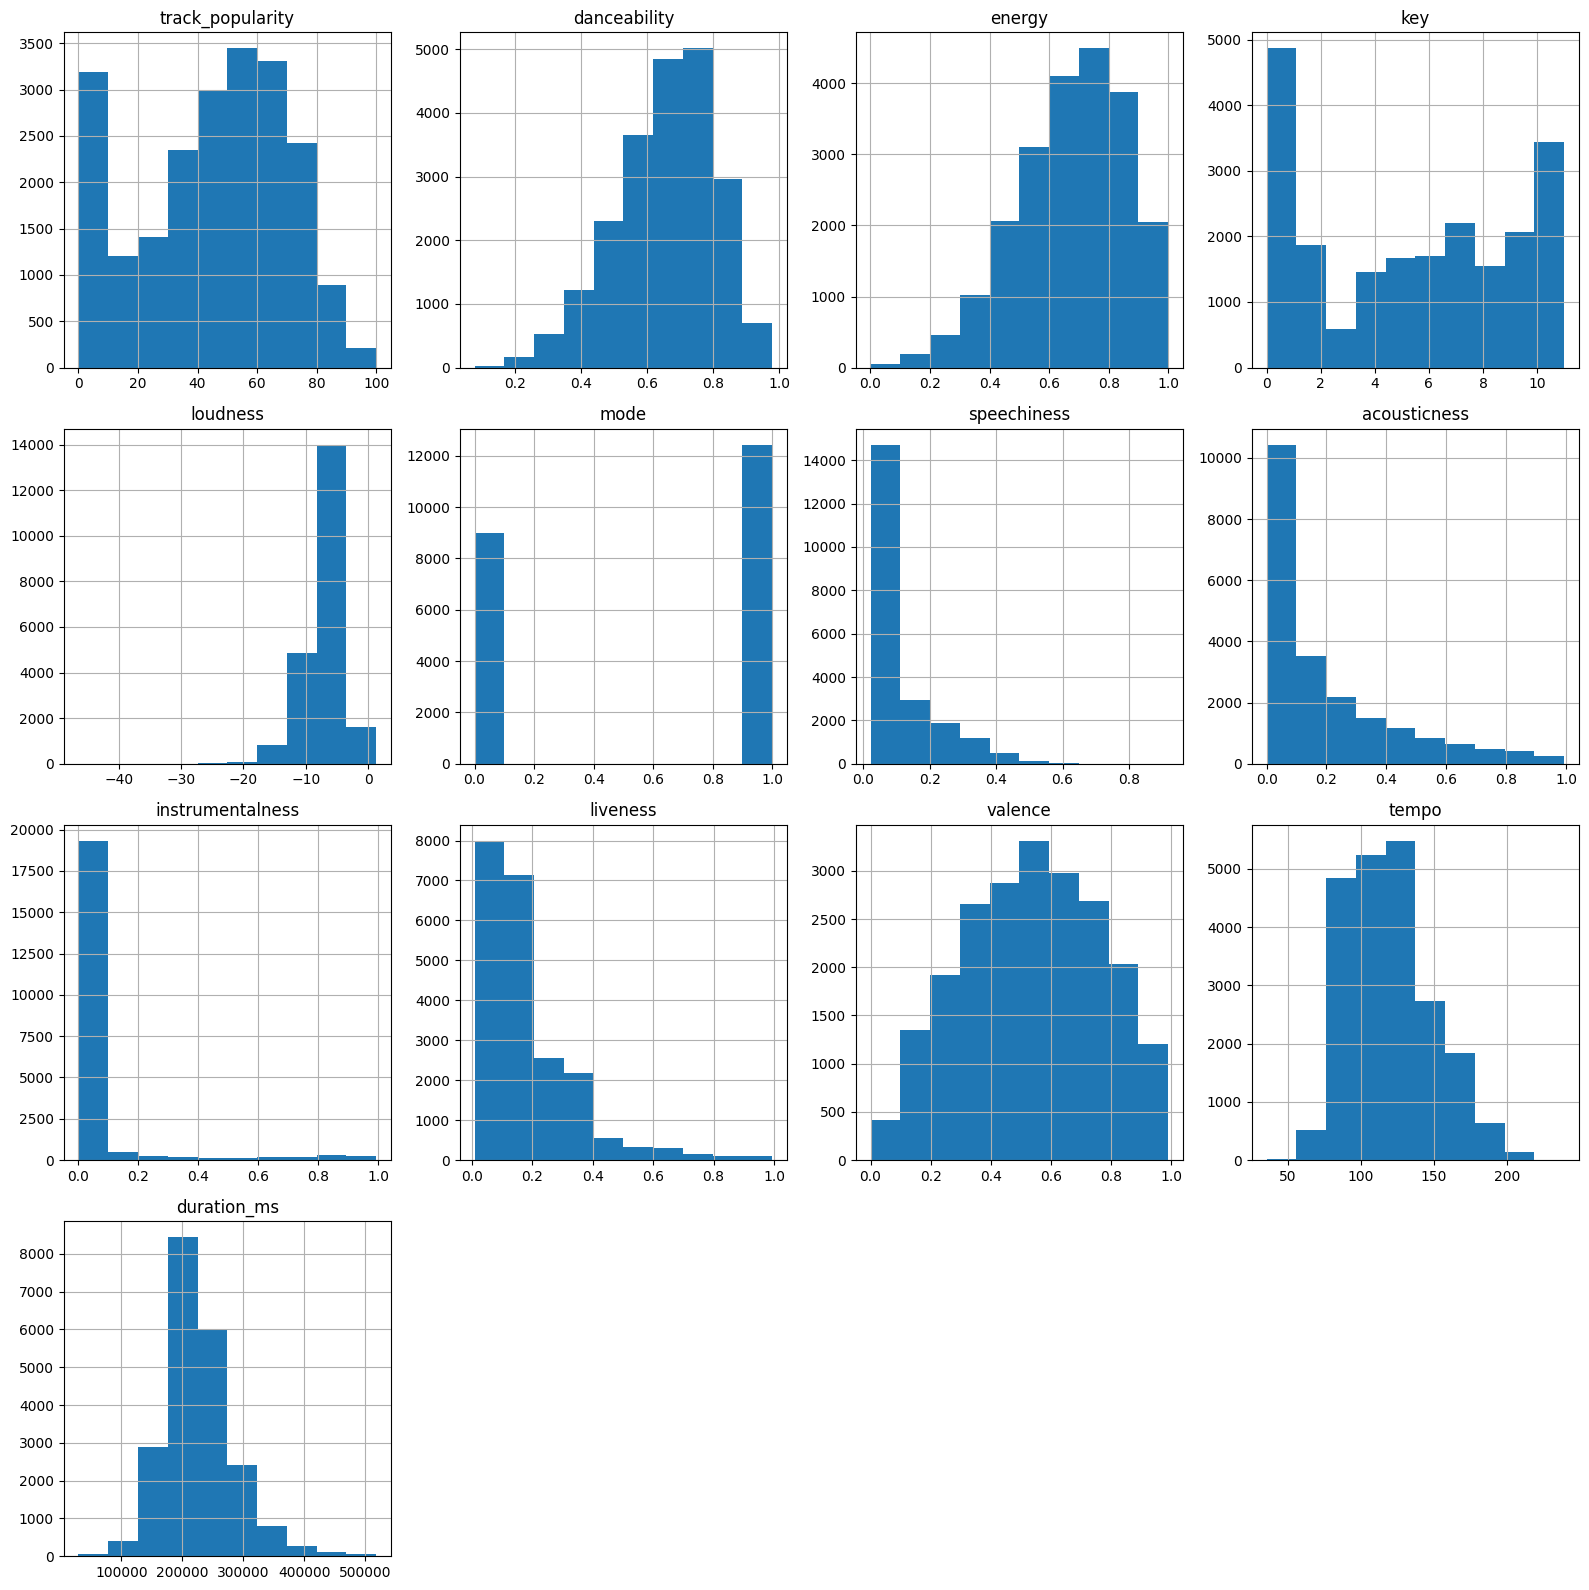

In [64]:
# Histogrammes des variables numériques

num_cols = [
    "track_popularity",
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

train_df[num_cols].hist(figsize=(16, 16))
plt.tight_layout()
plt.show()


---

Avant de poursuivre, nous allons explorer visuellement plusieurs aspects clés de notre jeu de données. Nous commencerons par un histogramme illustrant la distribution des genres, puis nous examinerons la matrice de corrélation afin d’identifier les relations entre les variables quantitatives. Nous calculerons également la popularité moyenne des pistes par genre et, enfin, nous visualiserons la relation entre la dansabilité et l’énergie, réparties par genre, pour approfondir notre compréhension des caractéristiques musicales.

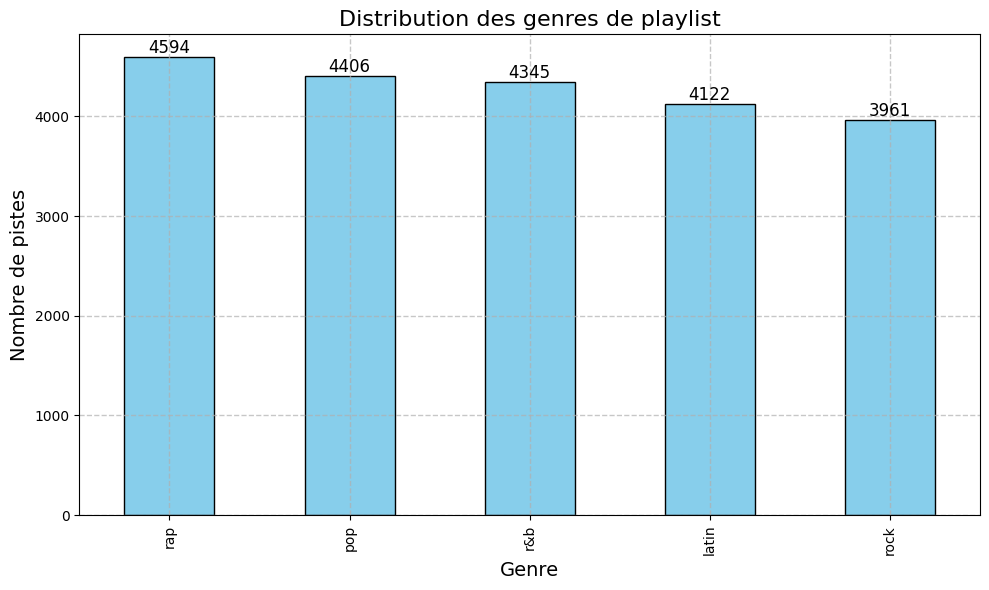

In [65]:
# Histogramme pour la répartition des genres

plt.figure(figsize=(10, 6))
ax = genre_counts.plot(kind="bar", color="skyblue", edgecolor="black")
plt.title("Distribution des genres de playlist", fontsize=16)
plt.xlabel("Genre", fontsize=14)
plt.ylabel("Nombre de pistes", fontsize=14)
plt.grid(True, which="both", linestyle="--", linewidth=1, alpha=0.7)

# Le bout de code suivant, gérant l'affichage des valeurs sur les barres a été généré avec ChatGPT :
# Affichage des valeurs au-dessus des barres
for p in ax.patches:
    height = p.get_height()
    plt.text(
        p.get_x() + p.get_width() / 2,  # Position en x (centre de la barre)
        height,  # Position en y (hauteur de la barre)
        f"{int(height)}",  # Texte à afficher
        ha="center",  # Alignement horizontal
        va="bottom",  # Alignement vertical
        fontsize=12,
        color="black",
    )


plt.tight_layout()
plt.show()


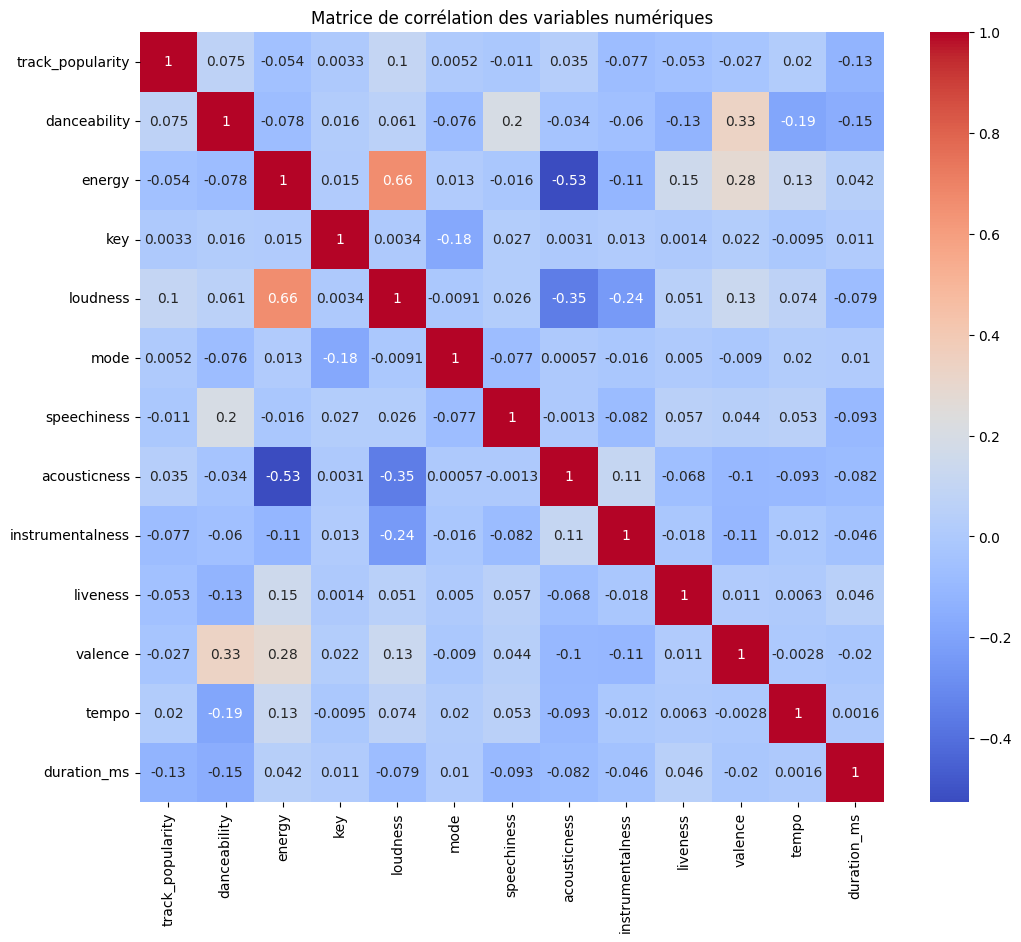

In [66]:
# Affichage d'une matrice de corrélation entre les variables numériques
plt.figure(figsize=(12, 10))
corr_matrix = train_df[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Matrice de corrélation des variables numériques")
plt.show()


In [67]:
# Calcule la popularité moyenne des pistes pour chaque genre de playlist
popularity_by_genre = train_df.groupby("playlist_genre")["track_popularity"].mean()
print(popularity_by_genre)


playlist_genre
latin    46.981320
pop      48.216750
r&b      41.292750
rap      43.180017
rock     41.649836
Name: track_popularity, dtype: float64


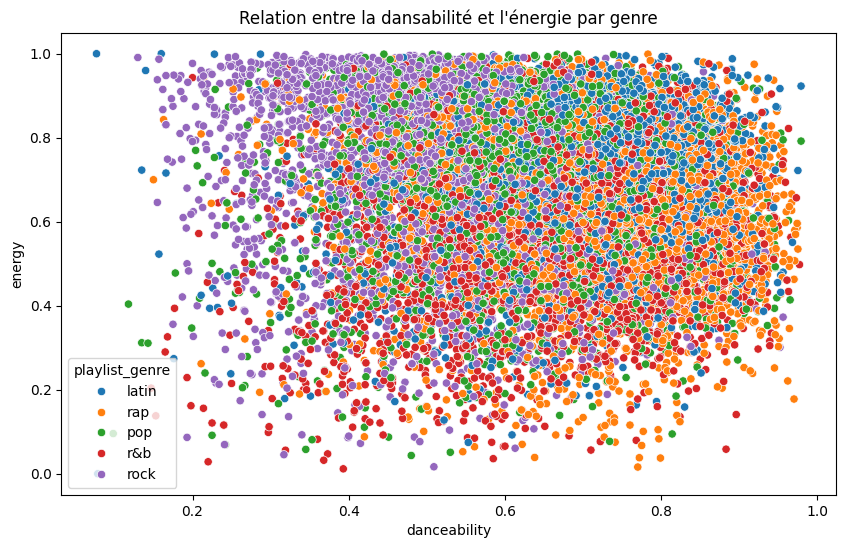

In [87]:
# Nuage de points montrant la relation entre la dansabilité, l'énergie et le genre de playlist
plt.figure(figsize=(10, 6))
sns.scatterplot(data=train_df, x="danceability", y="energy", hue="playlist_genre")
plt.title("Relation entre la dansabilité et l'énergie par genre")
plt.show()


Ce code effectue une exploration préliminaire des données : il charge les fichiers d’entraînement et de test, examine la structure des données (types de variables, dimensions), calcule des statistiques descriptives, puis visualise les distributions, la répartition des genres, et les relations entre variables numériques. Ces analyses offrent une première compréhension de l’ensemble de données et posent les bases pour des traitements et modèles plus avancés.

---

### **1.3 :** Application d'algorithmes standards


In [69]:
# Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [70]:
# Chargement des données d'entraînement
train_df = pd.read_csv("train.csv", sep="\t")


In [71]:
# Liste des colonnes quantitatives
quantitative_columns = [
    "danceability",
    "energy",
    "key",
    "loudness",
    "mode",
    "speechiness",
    "acousticness",
    "instrumentalness",
    "liveness",
    "valence",
    "tempo",
    "duration_ms",
]

# Sélection des features (X)
X = train_df[quantitative_columns]


In [72]:
# Variable cible
y = train_df["playlist_genre"]

# Encodage des labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42
)


In [74]:
scaler = StandardScaler()

# Ajustement sur les données d'entraînement
X_train_scaled = scaler.fit_transform(X_train)

# Transformation des données de test
X_test_scaled = scaler.transform(X_test)


#### SVM


In [75]:
svm_classifier = SVC()
svm_classifier.fit(X_train_scaled, y_train)

y_pred_svm = svm_classifier.predict(X_test_scaled)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
print(f"Accuracy du SVM : {accuracy_svm:.2f}")


Accuracy du SVM : 0.54


#### Arbre de décision


In [76]:
dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)

y_pred_dt = dt_classifier.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Accuracy de l'Arbre de Décision : {accuracy_dt:.2f}")


Accuracy de l'Arbre de Décision : 0.44


#### K-NN


In [77]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train_scaled, y_train)

y_pred_knn = knn_classifier.predict(X_test_scaled)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy du KNN : {accuracy_knn:.2f}")


Accuracy du KNN : 0.45


#### Random Forest


In [78]:
rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)

y_pred_rf = rf_classifier.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy du Random Forest : {accuracy_rf:.2f}")


Accuracy du Random Forest : 0.56


#### Regression Logistique


In [79]:
lr_classifier = LogisticRegression(max_iter=1000)
lr_classifier.fit(X_train_scaled, y_train)

y_pred_lr = lr_classifier.predict(X_test_scaled)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f"Accuracy de la Régression Logistique : {accuracy_lr:.2f}")


Accuracy de la Régression Logistique : 0.49


#### Resultats


In [80]:
print("\nRésultats des modèles :\n")
print(f"Accuracy du Random Forest : {accuracy_rf:.2f}")


print(f"Accuracy du SVM : {accuracy_svm:.2f}")
print(f"Accuracy de la Régression Logistique : {accuracy_lr:.2f}")
print(f"Accuracy du KNN : {accuracy_knn:.2f}")



print(f"Accuracy de l'Arbre de Décision : {accuracy_dt:.2f}")



Résultats des modèles :

Accuracy du Random Forest : 0.56
Accuracy du SVM : 0.54
Accuracy de la Régression Logistique : 0.49
Accuracy du KNN : 0.45
Accuracy de l'Arbre de Décision : 0.44


##### **INTERESTING TO LOOK AT BECAUSE RANDOM FOREST IS THE BEST ONE**


In [81]:
print("\nRapport de classification pour le Random Forest :")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))

print("\n\n\nMatrice de confusion pour le Random Forest :")
print(confusion_matrix(y_test, y_pred_rf))



Rapport de classification pour le Random Forest :
              precision    recall  f1-score   support

       latin       0.52      0.45      0.48       849
         pop       0.49      0.47      0.48       915
         r&b       0.50      0.46      0.48       846
         rap       0.61      0.67      0.64       913
        rock       0.67      0.77      0.72       763

    accuracy                           0.56      4286
   macro avg       0.56      0.56      0.56      4286
weighted avg       0.55      0.56      0.56      4286




Matrice de confusion pour le Random Forest :
[[382 196  95 135  41]
 [145 429 127  71 143]
 [105 101 386 179  75]
 [ 81  70 111 614  37]
 [ 20  79  58  15 591]]


In [82]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(rf_classifier, X, y_encoded, cv=5)
print(f"Scores de validation croisée (Random Forest) : {scores}")
print(f"Score moyen : {scores.mean():.2f}")


Scores de validation croisée (Random Forest) : [0.55459636 0.57536164 0.55879608 0.56942824 0.55052509]
Score moyen : 0.56


La case suivante prend 8 minutes à elle seule pour tourner, les résultats que j'ai obtenu sont les suivants :

- Meilleurs paramètres : {'max_depth': 20, 'min_samples_split': 10, 'n_estimators': 200}
- Meilleure score : 0.56


In [83]:
# from sklearn.model_selection import GridSearchCV

# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 5, 10, 20],
#     'min_samples_split': [2, 5, 10]
# }

# grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
# grid_search.fit(X_train, y_train)

# print(f"Meilleurs paramètres : {grid_search.best_params_}")
# print(f"Meilleure score : {grid_search.best_score_:.2f}")


In [84]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

print("Importance des caractéristiques :")
for f in range(X.shape[1]):
    print(
        f"{f + 1}. {quantitative_columns[indices[f]]} ({importances[indices[f]]:.4f})"
    )


Importance des caractéristiques :
1. speechiness (0.1332)
2. danceability (0.1245)
3. tempo (0.0986)
4. duration_ms (0.0957)
5. energy (0.0944)
6. acousticness (0.0924)
7. loudness (0.0877)
8. valence (0.0851)
9. liveness (0.0686)
10. instrumentalness (0.0609)
11. key (0.0451)
12. mode (0.0137)
